In [1]:
##module to get timeseries of the regional average of a variable

In [1]:
import modules as md 
import xarray as xr
xr.set_options(display_style='html')
import intake
import cftime
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import s3fs
%matplotlib inline

In [2]:
## Chlorophyll trends


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


Text(0, 0.5, 'Chlorophyll mass concentration (Kg/$m^-3$)')

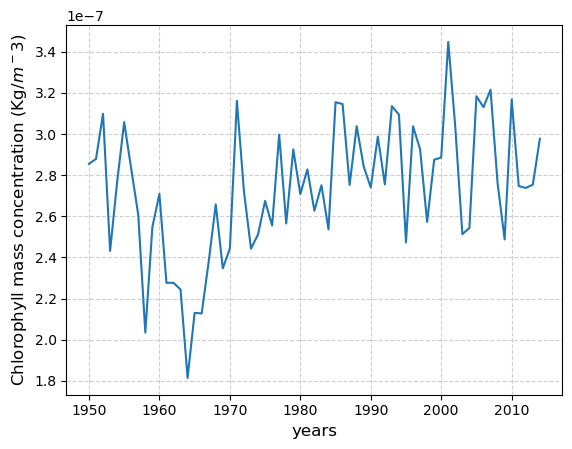

In [3]:
min_lat= 65.9
max_lat= 81.9
min_lon= 16.6
max_lon= 68.6
var='chlos'
cel_type='areacello'
model= 'NorESM2-LM'

files_dir='/escience2022/Ada/monthly/chlos_Omon_NorESM2-LM_historical_r1i1p1f1_gn*.nc'

inp_dms=[files_dir,model,min_lat,max_lat,min_lon,max_lon,var,cel_type]

BSDMS=md.regional_average(inp_dms)

BSDMS.plot(x='year')
plt.title('')
plt.grid('True',alpha=0.6,linestyle='--')
plt.xlabel('years',fontsize=12)
plt.ylabel('Chlorophyll mass concentration (Kg/$m^-3$)',fontsize=12)


## timeseries of DMS at Surface


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


Text(0, 0.5, 'DMS at Ocean Surface')

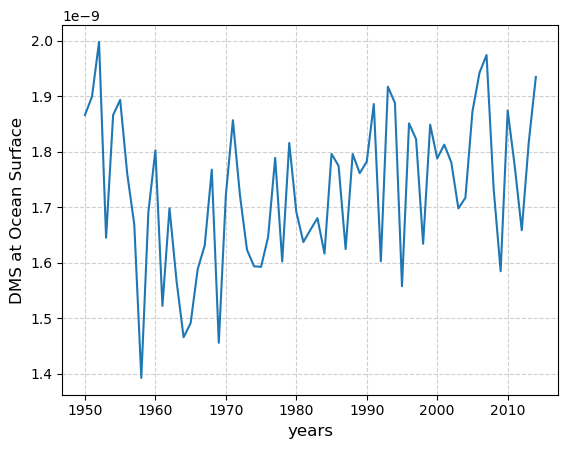

In [8]:
min_lat= 65.9
max_lat= 81.9
min_lon= 16.6
max_lon= 68.6
var='dmsos'
cel_type='areacello'
model= 'NorESM2-LM'

files_dir='/escience2022/Ada/monthly/dmsos_Omon_NorESM2-LM_historical_r1i1p1f1_gn*.nc'

inp_dms=[files_dir,model,min_lat,max_lat,min_lon,max_lon,var,cel_type]

BSDMS=md.regional_average(inp_dms)

BSDMS.plot(x='year')
plt.title('')
plt.grid('True',alpha=0.6,linestyle='--')
plt.xlabel('years',fontsize=12)
plt.ylabel('DMS at Ocean Surface',fontsize=12)
#plt.savefig('plots/DMS_at_surface_timeseries.png',dpi=500)

## Sea ice and sea surface temperature

In [ ]:
min_lat= 65.9
max_lat= 81.9
min_lon= 16.6
max_lon= 68.6
var_ice='siconc'
var_temp='tos'
cel_type='areacello'
model= 'NorESM2-LM'

files_dir='/escience2022/Ada/monthly/siconc_SImon_NorESM2-LM_historical_r1i1p1f1_gn*.nc'
tos_dir='/escience2022/Ada/monthly/tos_Omon_NorESM2-LM_historical_r1i1p1f1_gn_*.nc'

inp_ice=[files_dir,model,min_lat,max_lat,min_lon,max_lon,var_ice,cel_type]
inp_tos= [tos_dir,model,min_lat,max_lat,min_lon,max_lon,var_temp,cel_type]

BSice=md.regional_average(inp_ice)
BStos=md.regional_average(inp_tos)

fig=plt.figure()
ax=fig.add_subplot()

BSice.plot(x='year',ax=ax,color='tab:blue',label='Sea Ice')
ax1= ax.twinx()
BStos.plot(x='year',ax=ax1,color='tab:orange',label='SST')

plt.title('')
plt.grid('True',alpha=0.6,linestyle='--')
plt.xlabel('years',fontsize=12)
ax.set_ylabel('Sea Ice ',fontsize=12)
ax1.set_ylabel('Sea surface temperature ($^\circ$C)',fontsize=12)
ax.legend(fontsize=10,loc=(0.4,0.9))
ax1.legend(fontsize=10,loc=(0.4,0.8))
plt.savefig('plots/sea_ice_temperature_timeseries.png',dpi=500)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


## Yearly Anomaly plots 

##  Chlorophyll

In [2]:
var='chlos'
anm1=md.anomaly(var)[0]
anm1

<xarray.DataArray (j: 385, i: 360)>
dask.array<sub, shape=(385, 360), dtype=float64, chunksize=(385, 360), chunktype=numpy.ndarray>
Coordinates:
  * j          (j) int32 1 2 3 4 5 6 7 8 9 ... 378 379 380 381 382 383 384 385
  * i          (i) int32 1 2 3 4 5 6 7 8 9 ... 353 354 355 356 357 358 359 360
    longitude  (j, i) float64 dask.array<chunksize=(385, 360), meta=np.ndarray>
    latitude   (j, i) float64 dask.array<chunksize=(385, 360), meta=np.ndarray>

/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


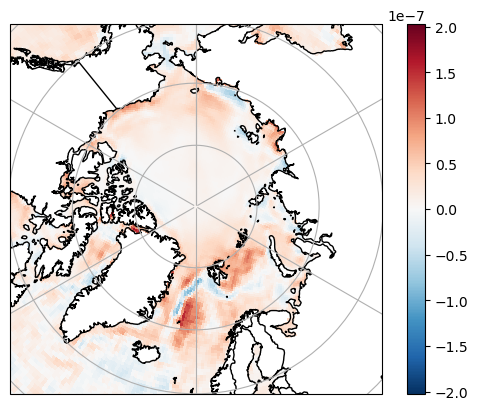

In [3]:
fig=plt.figure()
ax1=fig.add_subplot(projection=ccrs.NorthPolarStereo())#NearsidePerspective())

ax1.set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
#ax1.stock_img()
ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.COASTLINE)
ax1.gridlines()
#'viridis',Greens,winter

anm1.plot(ax=ax1, transform=ccrs.PlateCarree(), x='longitude', y='latitude')

#cc=ax1.pcol(anm1.longitude,anm1.latitude,anm1,transform=ccrs.PlateCarree())


## DMSOS

In [4]:
var='dmsos'
anm1=md.anomaly(var)[0]
anm1

<xarray.DataArray (j: 385, i: 360)>
dask.array<sub, shape=(385, 360), dtype=float64, chunksize=(385, 360), chunktype=numpy.ndarray>
Coordinates:
  * j          (j) int32 1 2 3 4 5 6 7 8 9 ... 378 379 380 381 382 383 384 385
  * i          (i) int32 1 2 3 4 5 6 7 8 9 ... 353 354 355 356 357 358 359 360
    longitude  (j, i) float64 dask.array<chunksize=(385, 360), meta=np.ndarray>
    latitude   (j, i) float64 dask.array<chunksize=(385, 360), meta=np.ndarray>

/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


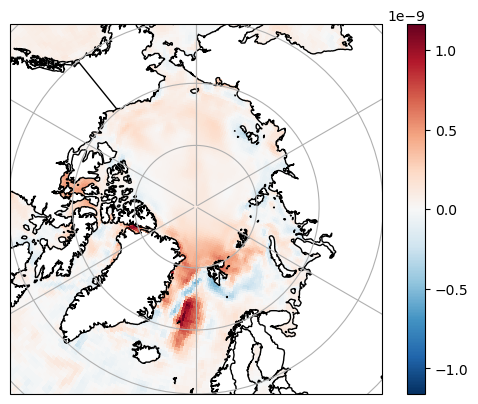

In [5]:
fig=plt.figure()
ax1=fig.add_subplot(projection=ccrs.NorthPolarStereo())#NearsidePerspective())

ax1.set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
#ax1.stock_img()
ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.COASTLINE)
ax1.gridlines()
#'viridis',Greens,winter

anm1.plot(ax=ax1, transform=ccrs.PlateCarree(), x='longitude', y='latitude')

## Sea Ice

In [6]:
var='siconc'
anm1=md.anomaly(var)[0]

/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


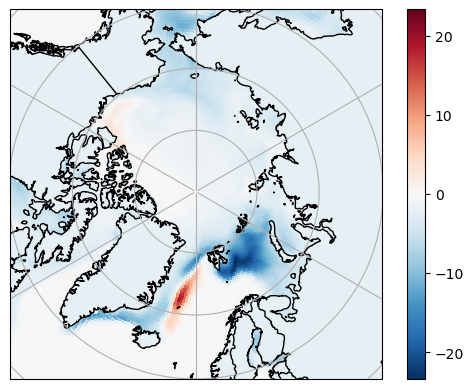

In [7]:
fig=plt.figure()
ax1=fig.add_subplot(projection=ccrs.NorthPolarStereo())#NearsidePerspective())

ax1.set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
#ax1.stock_img()
ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.COASTLINE)
ax1.gridlines()
#'viridis',Greens,winter
#percentage change
anm1.plot(ax=ax1, transform=ccrs.PlateCarree(), x='longitude', y='latitude')

In [3]:
#put above plots into a subplot with proper labelling

<xarray.Dataset>
Dimensions:             (time: 60, bnds: 2, j: 384, i: 360, vertices: 4)
Coordinates:
  * time                (time) object 2010-01-16 12:00:00 ... 2014-12-16 12:0...
  * j                   (j) int32 1 2 3 4 5 6 7 ... 378 379 380 381 382 383 384
  * i                   (i) int32 1 2 3 4 5 6 7 ... 354 355 356 357 358 359 360
    latitude            (j, i) float64 dask.array<chunksize=(384, 360), meta=np.ndarray>
    longitude           (j, i) float64 dask.array<chunksize=(384, 360), meta=np.ndarray>
    type                |S7 ...
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) object dask.array<chunksize=(60, 2), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float64 dask.array<chunksize=(384, 360, 4), meta=np.ndarray>
    vertices_longitude  (j, i, vertices) float64 dask.array<chunksize=(384, 360, 4), meta=np.ndarray>
    siconc              (time, j, i) float32 dask.array<chunksize=(60, 384, 360), meta=np.ndarray>
Attributes: (12/49)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               CMIP
    branch_method:             Hybrid-restart from year 1600-01-01 of piControl
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     430335.0
    ...                        ...
    title:                     NorESM2-LM output prepared for CMIP6
    variable_id:               siconc
    variant_label:             r1i1p1f1
    license:                   CMIP6 model data produced by NCC is licensed u...
    cmor_version:              3.5.0
    tracking_id:               hdl:21.14100/6cf248d4-c5bf-472a-bcd0-1de19001313e

min_lat= 65.9
max_lat= 81.9
min_lon= 16.6
max_lon= 68.6
var1='zoocos'
var2='zooc'
cel_type='areacello'
model= 'NorESM2-LM'

files_dir1='/escience2022/Ada/monthly/zoocos_Omon_NorESM2-LM_historical_r1i1p1f1_gr*.nc'
files_dir2='/escience2022/Ada/monthly/zooc_Omon_NorESM2-LM_historical_r1i1p1f1_gr_*.nc'

inp_zoocos=[files_dir1,model,min_lat,max_lat,min_lon,max_lon,var1,cel_type]
inp_zooc=[files_dir2,model,min_lat,max_lat,min_lon,max_lon,var2,cel_type]


BSzoocos=md.regional_average(inp_zoocos)
BSzoo=md.regional_average(inp_zooc)

fig=plt.figure()
ax=fig.add_subplot()

BSzoocos.plot(x='year',ax=ax,color='tab:blue',label='Surface Zooplankton')
ax1= ax.twinx()
BSzoo.plot(x='year',ax=ax1,color='tab:orange',label='Zooplankton')

plt.title('')
plt.grid('True',alpha=0.6,linestyle='--')
plt.xlabel('years',fontsize=12)
ax.set_ylabel('Zooplankton carbon concentration',fontsize=9)
ax1.set_ylabel('Surface Zooplankton carbon concentration',fontsize=9)
ax.legend(fontsize=12,loc=(0.4,0.8))
ax1.legend(fontsize=12,loc=(0.4,0.7))
plt.savefig('plots/zooplankton_surface_and_ML.png',dpi=500)